# Laplace Transform Applications in RLC Circuits

In this notebook, we apply the Laplace Transform to analyze electrical circuits involving resistors (R), inductors (L), and capacitors (C).

We will:
- Derive the differential equation of a simple RLC circuit
- Use Laplace Transforms to solve for the output (voltage or current)
- Analyze step response
- Visualize the result using plots


In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lti, step

sp.init_printing(use_latex='mathjax')
t, s = sp.symbols('t s', real=True, positive=True)


## Example: Series RLC Circuit

We consider a step voltage input \\( V_{in}(t) = 1 \cdot u(t) \\) applied to a series RLC circuit.

Using Kirchhoff’s Voltage Law:
\\[
L \frac{d^2i(t)}{dt^2} + R \frac{di(t)}{dt} + \frac{1}{C} i(t) = \frac{dV_{in}}{dt}
\\]

Since \\( V_{in}(t) = u(t) \\), its derivative is a delta function.  
Alternatively, we apply Laplace directly to:
\\[
V_{in}(s) = I(s) \left( Ls^2 + Rs + \frac{1}{C} \right)
\\]


In [2]:
# Define components
R, L, C = 1, 1, 1

# Input voltage (unit step)
Vin = 1 / s

# Impedance of RLC
Z = L*s**2 + R*s + 1/C

# Solve for I(s)
I = Vin / Z
I


       1        
────────────────
  ⎛ 2          ⎞
s⋅⎝s  + s + 1.0⎠

In [3]:
#Inverse Laplace to get i(t)
i_t = sp.inverse_laplace_transform(I, s, t)
i_t


                            -t                   -t           
                            ───                  ───          
                             2     ⎛√3⋅t⎞         2     ⎛√3⋅t⎞
1.0 - 0.333333333333333⋅√3⋅ℯ   ⋅sin⎜────⎟ - 1.0⋅ℯ   ⋅cos⎜────⎟
                                   ⎝ 2  ⎠               ⎝ 2  ⎠

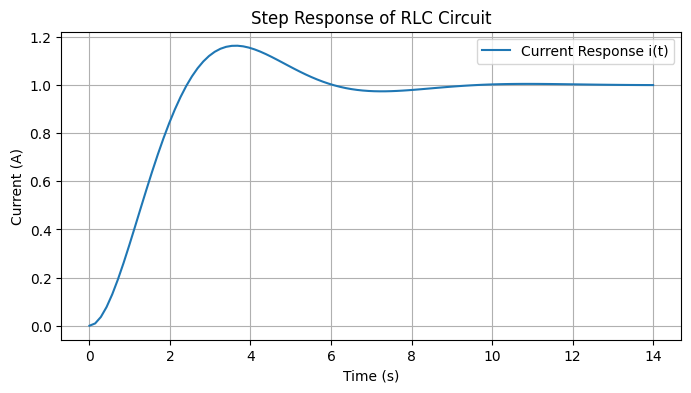

In [4]:
# Define LTI system using transfer function
num = [1]
den = [L, R, 1/C]

system = lti(num, den)
t_vals, i_vals = step(system)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_vals, i_vals, label='Current Response i(t)')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Step Response of RLC Circuit')
plt.grid(True)
plt.legend()
plt.show()


## Summary

Using Laplace Transforms, we:
- Modeled a series RLC circuit in the s-domain
- Solved for the current response to a unit step input
- Converted back to the time domain
- Verified and visualized the solution using Python

Laplace Transforms greatly simplify the analysis of circuits, especially when initial conditions or piecewise inputs are involved.


---

## Parallel RLC Circuit

We now analyze a **parallel RLC circuit** where the voltage across each component is the same, and the input is a unit step voltage source:



     ----R----
    |        |


Vin(t) | |
| |
----L----
| |
---C----
| |
GND GND


The total current into the network is:

\\[
i(t) = i_R(t) + i_L(t) + i_C(t)
\\]

Using Ohm’s and Kirchhoff’s laws:

- \\( i_R(t) = \frac{v(t)}{R} \\)
- \\( i_L(t) = \frac{1}{L} \int v(t) dt \\)
- \\( i_C(t) = C \frac{dv(t)}{dt} \\)

Taking Laplace Transform (with zero initial conditions):

\\[
I(s) = V(s) \left( \frac{1}{R} + \frac{1}{sL} + sC \right)
\\]


In [10]:
# Parameters
R, L, C = 1, 1, 1

# Input current is from voltage source through combined admittance
Vin = 1 / s
Y_parallel = 1/R + 1/(s*L) + s*C  # total admittance

# Solve for V(s)
V = Vin / Y_parallel
V


       1       
───────────────
  ⎛          1⎞
s⋅⎜s + 1.0 + ─⎟
  ⎝          s⎠

In [11]:
#Inverse Laplace to find v(t)
v_t = sp.inverse_laplace_transform(V, s, t)
v_t


                      -t           
                      ───          
                       2     ⎛√3⋅t⎞
0.666666666666667⋅√3⋅ℯ   ⋅sin⎜────⎟
                             ⎝ 2  ⎠

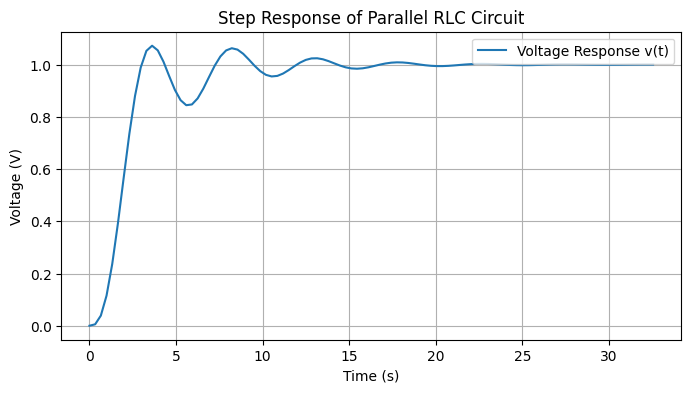

In [12]:
# Define transfer function for V(s)/I(s)
num = [1]
den = [C*L, R*L, L + R*C, R]

system_parallel = lti(num, den)
t_vals, v_vals = step(system_parallel)

# Plot voltage response
plt.figure(figsize=(8, 4))
plt.plot(t_vals, v_vals, label='Voltage Response v(t)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Step Response of Parallel RLC Circuit')
plt.grid(True)
plt.legend()
plt.show()


## Summary – Parallel RLC Circuit

In this section, we:
- Modeled a parallel RLC circuit in the s-domain using admittance
- Solved for the voltage response under unit step current input
- Used symbolic and numerical methods to find and visualize the time-domain response

This complements our earlier analysis of the series RLC circuit and demonstrates how Laplace analysis adapts to different configurations.


---

## Damping in RLC Circuits

The behavior of an RLC circuit (series or parallel) depends on the **damping ratio**:

\\[
\zeta = \frac{R}{2} \sqrt{\frac{C}{L}} \quad \text{(for parallel)}, \qquad \zeta = \frac{R}{2} \sqrt{\frac{1}{L/C}} = \frac{R}{2} \sqrt{\frac{C}{L}} \quad \text{(for series)}
\\]


In [13]:
from ipywidgets import interact
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step
import numpy as np

def damping_response(R=1.0, L=1.0, C=1.0):
    # Transfer function for a step response of a series RLC: V(s)/I(s)
    num = [1]
    den = [L, R, 1/C]
    sys = TransferFunction(num, den)
    
    t, y = step(sys)
    
    zeta = R / (2 * np.sqrt(L / C))
    
    plt.figure(figsize=(8, 4))
    plt.plot(t, y, label=f'Response (ζ = {zeta:.2f})')
    plt.title('Step Response of Series RLC Circuit')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(damping_response, R=(0.1, 5.0, 0.1), L=(0.1, 2.0, 0.1), C=(0.1, 2.0, 0.1));


interactive(children=(FloatSlider(value=1.0, description='R', max=5.0, min=0.1), FloatSlider(value=1.0, descri…

---

## Quiz: Understanding Damping

1. If \\( \zeta > 1 \\), what kind of damping does the circuit exhibit?
    - A) Underdamped  
    - B) Critically damped  
    - C) Overdamped  
    - D) Unstable

<details>
<summary>Click for answer</summary>
**Answer:** C) Overdamped
</details>

---

2. What happens to the step response of an underdamped system?
    - A) It diverges
    - B) It shows no oscillations
    - C) It oscillates and gradually settles
    - D) It stays constant

<details>
<summary>Click for answer</summary>
**Answer:** C) It oscillates and gradually settles
</details>


---

## Numerical Examples: Step Response for Different Damping Conditions

We'll use a series RLC circuit with:

- Inductance: \\( L = 1 \\, H \\)
- Capacitance: \\( C = 1 \\, F \\)

We'll vary \\( R \\) to explore different damping conditions:

- \\( R = 3 \\, \Rightar


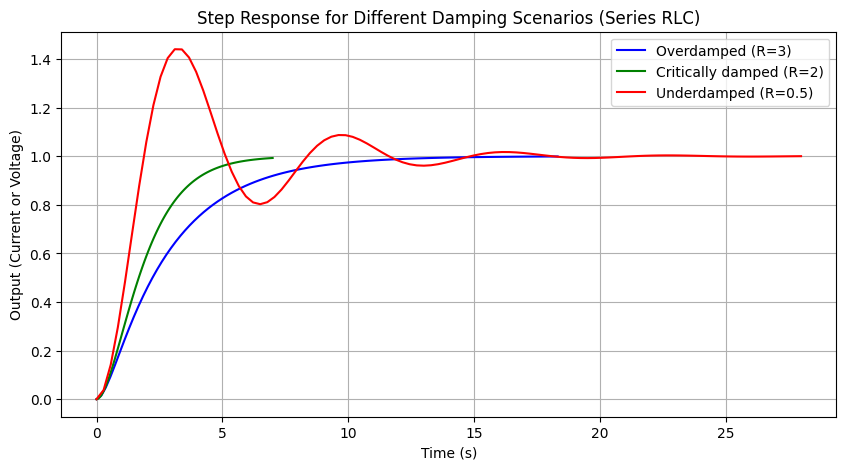

In [14]:
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step
import numpy as np

# Fixed L and C
L = 1
C = 1

# Define R values for different damping
R_values = [3, 2, 0.5]
labels = ['Overdamped (R=3)', 'Critically damped (R=2)', 'Underdamped (R=0.5)']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 5))

for R, label, color in zip(R_values, labels, colors):
    num = [1]
    den = [L, R, 1/C]
    system = TransferFunction(num, den)
    t, y = step(system)
    plt.plot(t, y, label=label, color=color)

plt.title('Step Response for Different Damping Scenarios (Series RLC)')
plt.xlabel('Time (s)')
plt.ylabel('Output (Current or Voltage)')
plt.grid(True)
plt.legend()
plt.show()


### Observation

- **Overdamped (R=3):** Slow, no oscillation. Two real, distinct poles.
- **Critically damped (R=2):** Fastest response without overshoot. Two repeated real poles.
- **Underdamped (R=0.5):** Oscillatory response with gradual decay. Complex conjugate poles.

This demonstrates how resistance (damping) directly shapes the time-domain behavior of RLC circuits.


---

## Quiz: Damping Behavior from Step Response Curves

1. Which response shows **oscillations that decay over time**?

    - A) Overdamped  
    - B) Critically damped  
    - C) Underdamped  
    - D) None of the above  

<details>
<summary>Click for answer</summary>
**Answer:** C) Underdamped
</details>

---

2. Which response reaches steady state **the fastest without oscillation**?

    - A) Underdamped  
    - B) Overdamped  
    - C) Critically damped  
    - D) All are the same  

<details>
<summary>Click for answer</summary>
**Answer:** C) Critically damped
</details>

---

3. In an **overdamped** system, the poles of the transfer function are:

    - A) Real and repeated  
    - B) Complex conjugates  
    - C) Real and distinct  
    - D) Imaginary only  

<details>
<summary>Click for answer</summary>
**Answer:** C) Real and distinct
</details>
